# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Rivanky Valensius Bara
- **Email:** vankystar7@gmail.com
- **ID Dicoding:** vankystar

## Menentukan Pertanyaan Bisnis

1. Bagaimana distribusi jumlah pesanan pada tahun 2018 berdasarkan kota tempat tinggal pelanggan?
2. Metode pembayaran apa yang paling sering digunakan untuk pesanan di tahun 2018, dan bagaimana pola penggunaannya?
3. Bagaimana tingkat pembayaran (payment value) pelanggan per bulan sepanjang tahun 2018?
4. Bagaimana hubungan antara jumlah seller dan volume pesanan seller di tiap kota pada tahun 2018?

## Import Semua Packages/Library yang Digunakan

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

## Data Wrangling

### Gathering Data

In [55]:
data_dir = "data/"

orders = pd.read_csv(data_dir + 'orders_dataset.csv')
orders_payments = pd.read_csv(data_dir + 'order_payments_dataset.csv')
orders_items = pd.read_csv(data_dir + 'order_items_dataset.csv')
sellers = pd.read_csv(data_dir + 'sellers_dataset.csv')
customers = pd.read_csv(data_dir + 'customers_dataset.csv')
geolocation = pd.read_csv(data_dir + 'geolocation_dataset.csv')


data = {'orders': orders,
        'order_payments': orders_payments,
        'order_items': orders_items,
        'sellers': sellers,
        'customers': customers,
        'geolocation': geolocation
        }

In [56]:
data['orders'].head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [57]:
data['order_payments'].head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [58]:
data['order_items'].head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [59]:
data['customers'].head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [60]:
data['sellers'].head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [61]:
data['geolocation'].head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


**Insight:**
Data berhasil dikumpulkan

### Assessing Data

In [62]:
for key, value in data.items():
    print(f'Info Tabel {key}')
    data[key].info()
    print('----------------------------------------------------------------')

Info Tabel orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
----------------------------------------------------------------
Info Tabel order_payments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count  

In [63]:
data['orders'].describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [64]:
data['order_payments']['payment_value'].describe(include="all")

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [65]:
data['order_items'].describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [66]:
data['customers'].describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [67]:
data['geolocation'].describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [68]:
Q1 = data['order_payments']['payment_sequential'].quantile(0.25)
Q3 = data['order_payments']['payment_sequential'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_payment_sequential = data['order_payments'][(data['order_payments']['payment_sequential'] < lower_bound) | (data['order_payments']['payment_sequential'] > upper_bound)]

print(outliers_payment_sequential[['order_id','payment_sequential']])

                                order_id  payment_sequential
25      5cfd514482e22bc992e7693f0e3e8df7                   2
75      3689194c14ad4e2e7361ebd1df0e77b0                   2
102     21b8b46679ea6482cbf911d960490048                   2
121     ea9184ad433a404df1d72fa0a8764232                   4
139     82ffe097d8ddbf319a523b9bbe7725d5                   2
164     487c1451b8fd7347d0e80e5aca887e91                   2
166     65c863d90026e9dd4888e28d2135c983                   2
181     591083bc42b589c7052118aa83118e76                   5
182     79b63d1f9cf0257b33b04fbfb0847cba                   2
199     332c6742772f2df936696b6512b10edb                   2
209     85e710051891004eca4f527adcadd0c3                   2
210     11978d520d85578c9f024b99ac1a87ef                   2
220     d56564f21e612a588607e9ffb39b9d21                   2
227     dc400373e624e9b0435847a79813c658                   2
267     bedff73fa5a137527ba9314cac93b7b3                   2
275     b80ba0f0c3d2a63f

In [69]:
for key, value in data.items():
    print(f'Jumlah Data Null Pada Tabel {key}')
    print(data[key].isna().sum())
    print('----------------------------------------------------------------')

Jumlah Data Null Pada Tabel orders
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
----------------------------------------------------------------
Jumlah Data Null Pada Tabel order_payments
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
----------------------------------------------------------------
Jumlah Data Null Pada Tabel order_items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
----------------------------------------------------------------
Jumlah Data Null Pada Tabel sellers
sel

In [70]:
for key, value in data.items():
    print(f'Jumlah Data Duplikat Pada Tabel {key} : {data[key].duplicated().sum()} ')
    print('--------------------------------------------------------------------')

Jumlah Data Duplikat Pada Tabel orders : 0 
--------------------------------------------------------------------
Jumlah Data Duplikat Pada Tabel order_payments : 0 
--------------------------------------------------------------------
Jumlah Data Duplikat Pada Tabel order_items : 0 
--------------------------------------------------------------------
Jumlah Data Duplikat Pada Tabel sellers : 0 
--------------------------------------------------------------------
Jumlah Data Duplikat Pada Tabel customers : 0 
--------------------------------------------------------------------
Jumlah Data Duplikat Pada Tabel geolocation : 261831 
--------------------------------------------------------------------


In [71]:
duplicates_all = data['geolocation'].duplicated()
print(f"Jumlah baris duplikat (semua kolom identik): {duplicates_all.sum()}")

Jumlah baris duplikat (semua kolom identik): 261831


**Insight:**
- Terdapat beberapa Column yang memiliki tipe data yang tidak sesuai pada tabel orders dan orders_items
- Ada data outlier pada Column payment_sequential payment_installments di Tabel order_payments pada hasil descibe, tapi setelah ditelusuri adalah hal wajar pada column tersebut.
- Terdapat data Null dalam jumlah yang cukup banyak pada tabel Order Column order_approved_at, order_delivered_carrier_date,    order_delivered_customer_date
- Terdapat data duplicated pada tabel geolocation

### Cleaning Data

In [72]:
datetime_column_orders = ['order_purchase_timestamp',
                          'order_approved_at',
                          'order_delivered_carrier_date',
                          'order_delivered_customer_date',
                          'order_estimated_delivery_date']

data['orders'][datetime_column_orders] = data['orders'][datetime_column_orders].apply(pd.to_datetime)

data['orders'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [73]:
#data['order_items'].rename(columns={'shipping_limit_date ': 'shipping_limit_date'}, inplace=True)
data['order_items']['shipping_limit_date'] = pd.to_datetime(data['order_items']['shipping_limit_date'])
data['order_items'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [74]:
data['orders'] = data['orders'].sort_values(by='order_purchase_timestamp')

column_orders_null = ['order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date']
data['orders'][column_orders_null] = data['orders'][column_orders_null].interpolate(method='linear')
data['orders'].head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51.000000000,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,2016-10-25 06:33:51.666666752,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,2016-10-31 23:52:52.333333248,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53.000000000,2016-11-09 07:47:38.000,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,2016-10-31 03:37:03.000000000,2016-11-02 10:54:55.500,2016-10-25


In [75]:
month_order_approved = data['orders']['order_approved_at'].dt.strftime('%m')
year_order_approved = data['orders']['order_approved_at'].dt.strftime('%Y')

data['orders'].insert(5,'month_order_approved', month_order_approved)
data['orders'].insert(6,'year_order_approved', year_order_approved)

data['orders'].head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,month_order_approved,year_order_approved,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,10,2016,2016-10-18 13:14:51.000000000,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,10,2016,2016-10-25 06:33:51.666666752,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,10,2016,2016-10-31 23:52:52.333333248,NaT,2016-09-30


In [76]:
for column in column_orders_null:
    data['orders'][column] = data['orders'][column].dt.floor('S')
    
data['orders'].head()

C:\Users\Vanky Star\AppData\Local\Temp\ipykernel_32064\3403150871.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  data['orders'][column] = data['orders'][column].dt.floor('S')
C:\Users\Vanky Star\AppData\Local\Temp\ipykernel_32064\3403150871.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  data['orders'][column] = data['orders'][column].dt.floor('S')
C:\Users\Vanky Star\AppData\Local\Temp\ipykernel_32064\3403150871.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  data['orders'][column] = data['orders'][column].dt.floor('S')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,month_order_approved,year_order_approved,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,10,2016,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,10,2016,2016-10-25 06:33:51,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,10,2016,2016-10-31 23:52:52,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,09,2016,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,10,2016,2016-10-31 03:37:03,2016-11-02 10:54:55,2016-10-25


In [77]:
data['orders'].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
month_order_approved             0
year_order_approved              0
order_delivered_carrier_date     0
order_delivered_customer_date    3
order_estimated_delivery_date    0
dtype: int64

In [78]:
data['orders'].dropna(axis=1,inplace=True)
data['orders'].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
month_order_approved             0
year_order_approved              0
order_delivered_carrier_date     0
order_estimated_delivery_date    0
dtype: int64

In [79]:
data['geolocation'].drop_duplicates(inplace=True)
print(f'Data duplikat tabel Geolaction : {data['geolocation'].duplicated().sum()}')

Data duplikat tabel Geolaction : 0


**Insight:**
- Mengubah tipe data untuk column ['order_purchase_timestamp','order_approved_at' 'order_delivered_carrier_date', 'order_delivered_customer_date','order_estimated_delivery_date'] pada tabel order menjadi tipe data datetime
- Mengubah tipe data untuk column 'shipping_limit_date' pada tabel order items
- Mengisi nilai null pada kolom ['order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date'] pada tabel orders menggunakan interpolate
- Mendrop data yang null karena terdapat 3 data null setelah melakukan interpolate
- Mendrop data duplicate pada tabel geolocation

In [106]:
data['orders'].to_csv('dashboard/data/orders_dataset.csv', index=False)
data['order_items'].to_csv('dashboard/data/order_items_dataset.csv', index=False)
data['order_payments'].to_csv('dashboard/data/order_payments_dataset.csv', index=False)
data['sellers'].to_csv('dashboard/data/sellers_dataset.csv', index=False)
data['customers'].to_csv('dashboard/data/customers_dataset.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [80]:
data['orders'].describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,month_order_approved,year_order_approved,order_delivered_carrier_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,12,3,NaN,NaN
top,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,delivered,NaN,NaN,08,2018,NaN,NaN
freq,1,1,96478,NaN,NaN,11023,54068,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:04:33.957210624,NaN,NaN,2018-01-03 14:27:51.637292288,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,NaN,NaN,2016-10-08 10:34:01,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,NaN,NaN,2017-09-14 20:32:11,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,NaN,NaN,2018-01-23 17:21:22,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,NaN,NaN,2018-05-08 09:55:00,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,NaN,NaN,2018-09-11 19:48:28,2018-11-12 00:00:00


In [81]:
data['orders'].groupby(by='order_status').order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [82]:
data['customers'].describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [83]:

pd.set_option('display.max_rows', None)
data['customers'].groupby(by='customer_state').customer_unique_id.nunique().sort_values(ascending=False)


customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

In [84]:
customer_city_df= data['customers'].groupby(by='customer_city').agg(
    count = ('customer_id','nunique')
    ).sort_values(by='count',ascending=False).reset_index()

print(customer_city_df)


                         customer_city  count
0                            sao paulo  15540
1                       rio de janeiro   6882
2                       belo horizonte   2773
3                             brasilia   2131
4                             curitiba   1521
5                             campinas   1444
6                         porto alegre   1379
7                             salvador   1245
8                            guarulhos   1189
9                sao bernardo do campo    938
10                             niteroi    849
11                         santo andre    797
12                              osasco    746
13                              santos    713
14                             goiania    692
15                 sao jose dos campos    691
16                           fortaleza    654
17                            sorocaba    633
18                              recife    613
19                       florianopolis    570
20                             jun

In [85]:
data['order_items'].describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [86]:
data['order_items'].loc[data['order_items']['freight_value'].idxmax()]

order_id               a77e1550db865202c56b19ddc6dc4d53
order_item_id                                         1
product_id             ec31d2a17b299511e7c8627be9337b9b
seller_id              257e61d3251fb5efb9daadddbc2cf7ca
shipping_limit_date                 2018-04-25 06:55:13
price                                             979.0
freight_value                                    409.68
Name: 73486, dtype: object

In [87]:
data['order_items'].loc[data['order_items']['price'].idxmax()]

order_id               0812eb902a67711a1cb742b3cdaa65ae
order_item_id                                         1
product_id             489ae2aa008f021502940f251d4cce7f
seller_id              e3b4998c7a498169dc7bce44e6bb6277
shipping_limit_date                 2017-02-16 20:37:36
price                                            6735.0
freight_value                                    194.31
Name: 3556, dtype: object

In [88]:
data['order_payments'].describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [89]:
data['order_payments'].groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [90]:
data['sellers'].describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [91]:
data['sellers'].groupby(by='seller_state').seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AM       1
AC       1
PI       1
MA       1
PA       1
Name: seller_id, dtype: int64

In [92]:
seller_by_city = data['sellers'].groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False).reset_index()
print(seller_by_city)

                                  seller_city  seller_id
0                                   sao paulo        694
1                                    curitiba        127
2                              rio de janeiro         96
3                              belo horizonte         68
4                              ribeirao preto         52
5                                   guarulhos         50
6                                    ibitinga         49
7                                 santo andre         45
8                                    campinas         41
9                                     maringa         40
10                      sao jose do rio preto         33
11                                   sorocaba         32
12                      sao bernardo do campo         32
13                                     osasco         32
14                               porto alegre         28
15                                   brasilia         28
16                             

In [93]:
result = pd.merge(data['orders'], data['customers'], on='customer_id', how='outer', indicator=True)
outer_null_customer_and_order = result[result['_merge'] != 'both']

print(outer_null_customer_and_order)

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, month_order_approved, year_order_approved, order_delivered_carrier_date, order_estimated_delivery_date, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, _merge]
Index: []


In [94]:
order_and_customers = pd.merge(
    data['orders'],
    data['customers'],
    on='customer_id',
    how='inner'
)

customer_city_df = order_and_customers[order_and_customers['year_order_approved'] == '2018']
customer_city_df= customer_city_df.groupby(by='customer_city').agg(
    count = ('customer_id','nunique')
    ).sort_values(by='count',ascending=False).reset_index()

print(customer_city_df)


                         customer_city  count
0                            sao paulo   9129
1                       rio de janeiro   3505
2                       belo horizonte   1556
3                             brasilia   1215
4                             curitiba    864
5                             campinas    820
6                            guarulhos    696
7                         porto alegre    681
8                             salvador    676
9                sao bernardo do campo    538
10                             niteroi    496
11                         santo andre    450
12                              osasco    423
13                              santos    417
14                 sao jose dos campos    408
15                             goiania    406
16                            sorocaba    360
17                              recife    341
18                           fortaleza    334
19                             jundiai    322
20                       florianop

In [95]:
customer_city_df.describe()

,count
count,3278.000000
mean,16.494204
std,179.493946
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,9129.000000


In [96]:
order_items_and_seller = pd.merge(
    data['order_items'],
    data['sellers'],
    on='seller_id',
    how='inner'
)

orders_and_seller = pd.merge(
    order_items_and_seller,
    data['orders'],
    on='order_id',
    how='inner'
)

orders_and_seller_2018 = orders_and_seller[orders_and_seller['year_order_approved'] == '2018']

orders_and_seller_2018 = orders_and_seller_2018.groupby(by='seller_city').order_id.nunique().sort_values(ascending=False).reset_index()
print(orders_and_seller_2018)
orders_and_seller_2018.to_csv('dashboard/orders_and_seller_2018.csv', index=False)

                                  seller_city  order_id
0                                   sao paulo     13869
1                                    ibitinga      3146
2                                    curitiba      1466
3                                   guarulhos      1414
4                                     maringa      1346
5                              ribeirao preto      1256
6                              rio de janeiro      1247
7                              belo horizonte      1174
8                                 santo andre      1078
9                       sao jose do rio preto       947
10                                 piracicaba       879
11                                   campinas       832
12                               praia grande       807
13                                      salto       777
14                      sao bernardo do campo       725
15                                    guariba       724
16                            itaquaquecetuba   

In [97]:
order_and_payment_df = pd.merge(
    data['orders'],
    data['order_payments'],
    how='inner',
    on='order_id'
)

In [98]:

order_and_payment_2018 = order_and_payment_df[order_and_payment_df['year_order_approved'] == '2018']

order_and_payment_2018 = order_and_payment_2018.groupby(by=['month_order_approved', 'payment_type']).agg(
    count=('order_id', 'nunique')
).reset_index()

print(order_and_payment_2018)
order_and_payment_2018.to_csv('dashboard/order_and_payment_2018.csv', index=False)

   month_order_approved payment_type  count
0                    01       boleto   1469
1                    01  credit_card   5483
2                    01   debit_card    108
3                    01      voucher    301
4                    02       boleto   1305
5                    02  credit_card   5236
6                    02   debit_card     68
7                    02      voucher    219
8                    03       boleto   1415
9                    03  credit_card   5688
10                   03   debit_card     80
11                   03      voucher    275
12                   04       boleto   1217
13                   04  credit_card   5353
14                   04   debit_card     97
15                   04      voucher    232
16                   05       boleto   1363
17                   05  credit_card   5569
18                   05   debit_card     49
19                   05      voucher    208
20                   06       boleto   1088
21                   06  credit_

In [99]:
payment_value_2018 = order_and_payment_df[order_and_payment_df['year_order_approved'] == '2018']

payment_value_2018 = payment_value_2018.groupby(by='month_order_approved').agg({'payment_value' : 'sum'}).reset_index()

print(payment_value_2018)
payment_value_2018.to_csv('dashboard/payment_value_2018.csv', index=False)

  month_order_approved  payment_value
0                   01     1106234.97
1                   02      984809.96
2                   03     1170925.93
3                   04     1137693.93
4                   05     1180198.57
5                   06     1028017.84
6                   07     1043311.34
7                   08     1052829.97
8                   09        5234.17


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

In [100]:
def color_bar_chart(data):
   return ['#1984c5' if x == data.max() else '#a7d5ed' for x in data]

In [101]:
bulan_mapping = {
    "01": "Jan",
    "02": "Feb",
    "03": "Mar",
    "04": "Apr",
    "05": "Mei",
    "06": "Jun",
    "07": "Jul",
    "08": "Agu",
    "09": "Sep",
    "10": "Okt",
    "11": "Nov",
    "12": "Des"
}

### Pertanyaan 1:

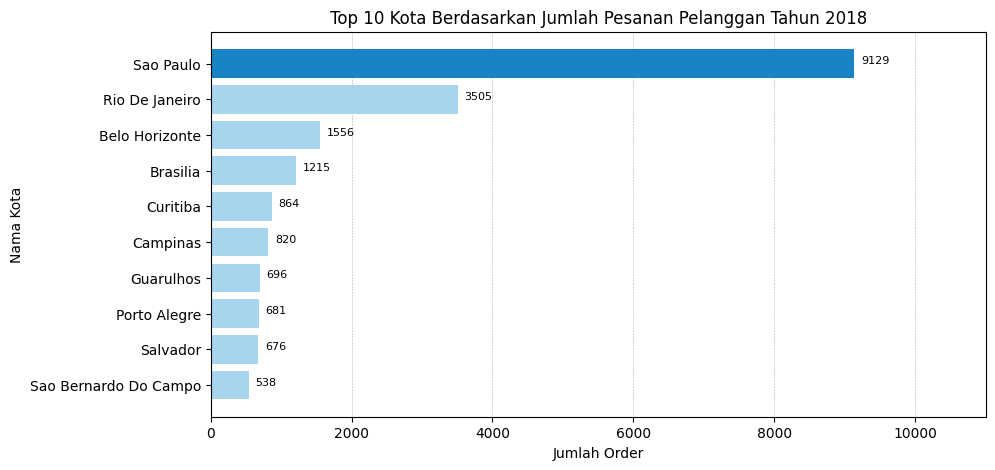

In [102]:
top_10 = customer_city_df.head(10).iloc[::-1]  
plt.figure(figsize=(10,5))
plt.barh(
    y=top_10.head(10)['customer_city'].str.title(),
    width=top_10.head(10)['count'],
    color= color_bar_chart(top_10['count']),
    zorder=2
)

for i,v in enumerate(top_10['count']):
    plt.text(v + 100, i, str(v), ha='left', fontsize=8, zorder=3)

plt.grid(axis='x', linestyle='--',linewidth=0.4, zorder=0)
plt.xlabel('Jumlah Order')
plt.ylabel('Nama Kota')
plt.title('Top 10 Kota Berdasarkan Jumlah Pesanan Pelanggan Tahun 2018', fontsize=12)

plt.xlim(0,11000)
plt.show()

### Pertanyaan 2:

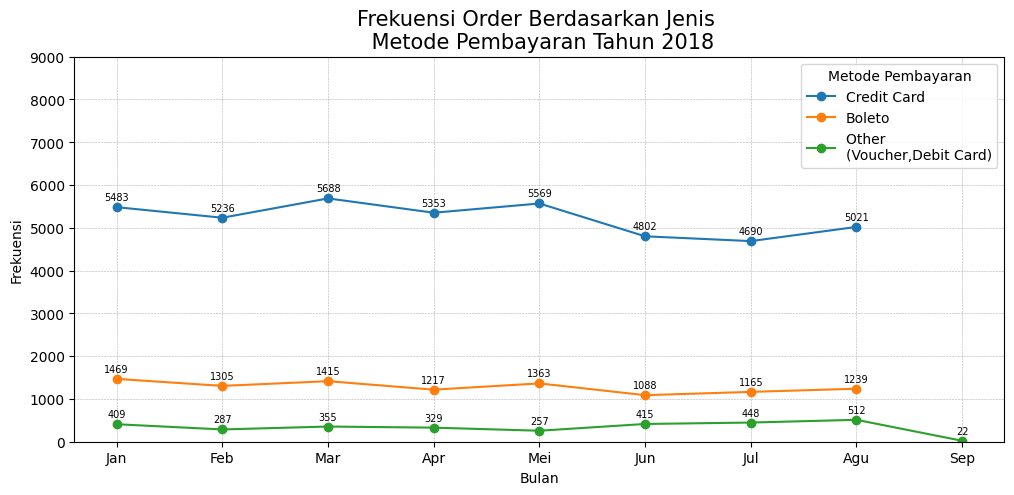

In [103]:
order_and_payment_2018['new_month'] = order_and_payment_2018['month_order_approved'].map(bulan_mapping)

credit_card= order_and_payment_2018[order_and_payment_2018['payment_type']  == 'credit_card']
boleto= order_and_payment_2018[order_and_payment_2018['payment_type'] == 'boleto']
other = order_and_payment_2018[order_and_payment_2018['payment_type'].isin(['voucher', 'debit_card'])]
other = other.groupby('month_order_approved').agg(
    count=('count', 'sum')
).reset_index()
other['new_month'] = other['month_order_approved'].map(bulan_mapping)

plt.figure(figsize=(12,5))
plt.plot(credit_card['new_month'], credit_card['count'], marker='o', label='Credit Card')
plt.plot(boleto['new_month'], boleto['count'], marker='o', label='Boleto')
plt.plot(other['new_month'], other['count'], marker='o', label='Other \n(Voucher,Debit Card)')

for i, v in enumerate(credit_card['count']):
    plt.text(i, v + 160, str(v), ha='center',fontsize=7)
    
for i, v in enumerate(boleto['count']):
    plt.text(i, v + 160, str(v), ha='center',fontsize=7)
    
for i, v in enumerate(other['count']):
    plt.text(i, v + 160, str(v), ha='center',fontsize=7)

plt.ylim(0,9000)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.4)
plt.legend(title='Metode Pembayaran')
plt.title('Frekuensi Order Berdasarkan Jenis \n Metode Pembayaran Tahun 2018',fontsize=15)
plt.xlabel('Bulan')
plt.ylabel('Frekuensi')
plt.show()

### Pertanyaan 3:

C:\Users\Vanky Star\AppData\Local\Temp\ipykernel_32064\2854382641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['new_month'] = filtered_data['month_order_approved'].map(bulan_mapping)


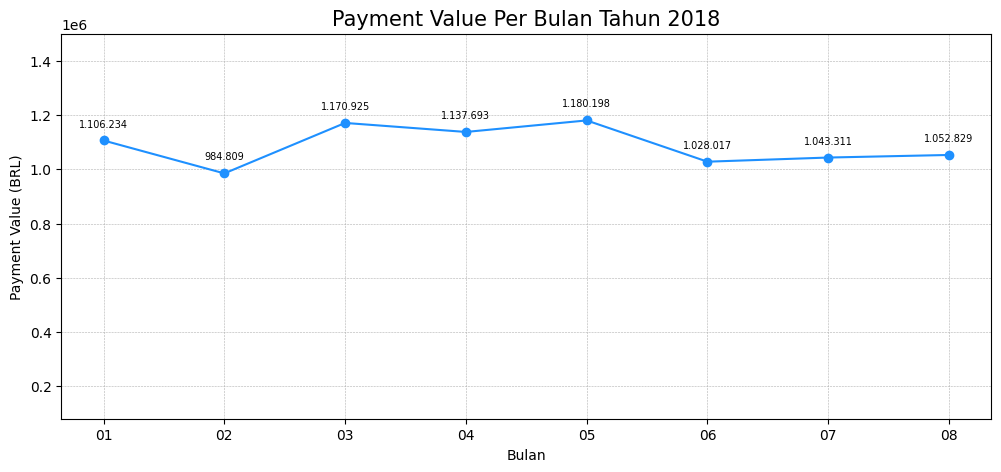

In [104]:
filtered_data = payment_value_2018[payment_value_2018['month_order_approved'] != '09']
filtered_data['new_month'] = filtered_data['month_order_approved'].map(bulan_mapping)
plt.figure(figsize=(12,5))

plt.plot(
    filtered_data['month_order_approved'],
    filtered_data['payment_value'],
    marker='o',
    label='Payment Value',
    color='dodgerblue'
)
for i, v in enumerate(filtered_data['payment_value']):
    plt.text(i, v + 50000, (f'{int(v):,}'.replace(',', '.')), ha='center', fontsize=7)

    
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.4)   
plt.ylim(80000,1500000)
plt.title('Payment Value Per Bulan Tahun 2018',fontsize=15)
plt.xlabel('Bulan')
plt.ylabel('Payment Value (BRL)')

plt.show()

### Pertanyaan 4:

C:\Users\Vanky Star\AppData\Local\Temp\ipykernel_32064\2378614981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Vanky Star\AppData\Local\Temp\ipykernel_32064\2378614981.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


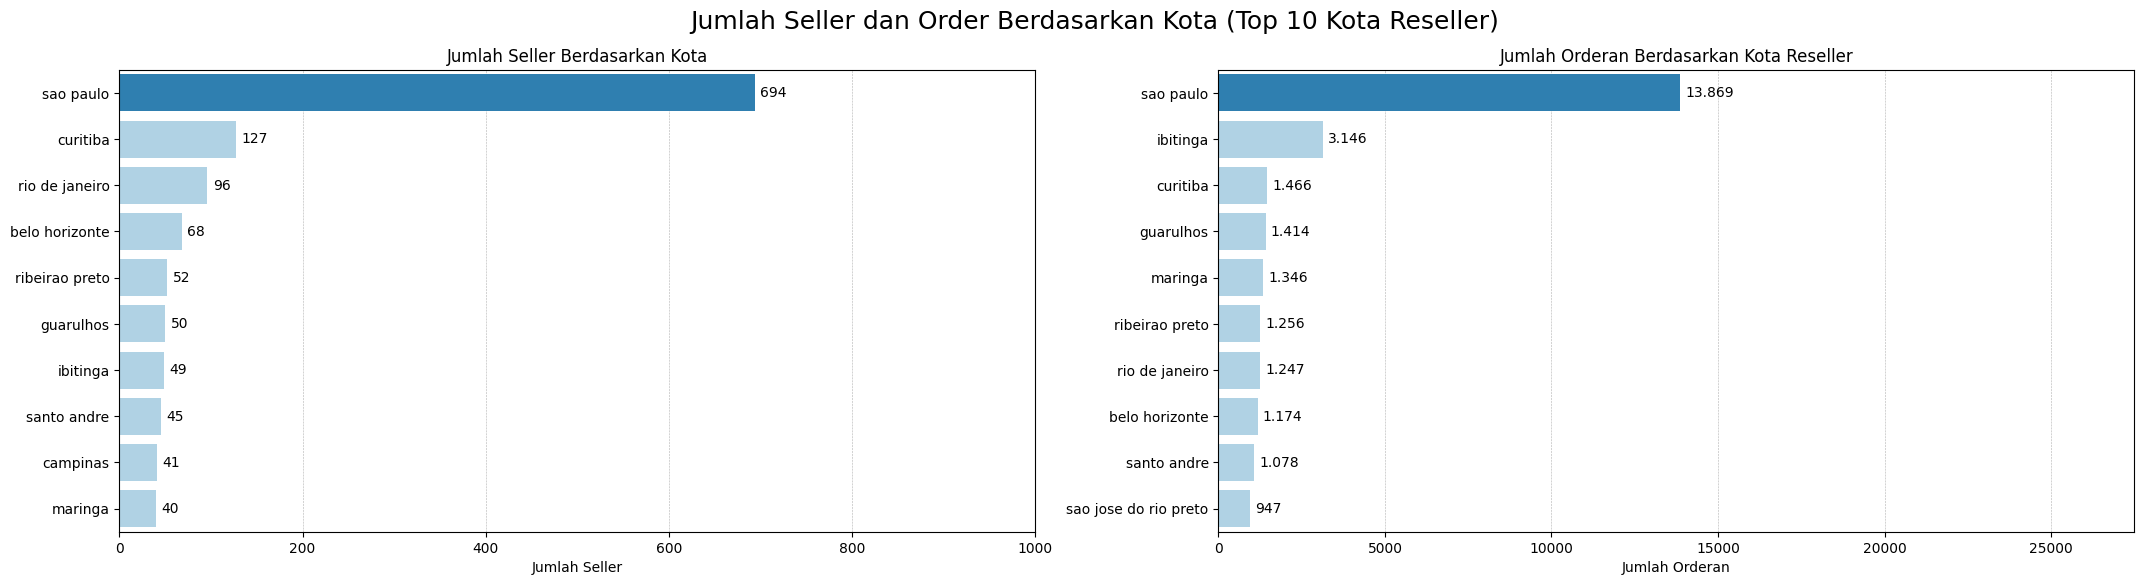

In [105]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(26,6))

sns.barplot(
    data=seller_by_city.head(10),
    x='seller_id',
    y='seller_city',
    ax=ax[0],
    palette=color_bar_chart(seller_by_city['seller_id'].head(10)),
    zorder=2
)
for i, v in enumerate(seller_by_city['seller_id'].head(10)):
    ax[0].text(v + 6,i, str(v), ha='left', va='center')
    
ax[0].grid(axis='x', linewidth=0.4, linestyle='--', zorder=0)
ax[0].set_xlabel('Jumlah Seller')
ax[0].set_ylabel('')
ax[0].set_title('Jumlah Seller Berdasarkan Kota',fontsize=12)
ax[0].set_xlim(0,1000)

sns.barplot(
    data=orders_and_seller_2018.head(10),
    x='order_id',
    y='seller_city',
    ax=ax[1],
    palette=color_bar_chart(orders_and_seller_2018['order_id'].head(10)),
    zorder=2
)
for i, v in enumerate(orders_and_seller_2018['order_id'].head(10)):
    ax[1].text(v + 150,i, f'{int(v):,}'.replace(',','.'), ha='left', va='center')
    
ax[1].grid(axis='x', linewidth=0.4, linestyle='--', zorder=0)
ax[1].set_xlabel('Jumlah Orderan')
ax[1].set_ylabel('')
ax[1].set_title('Jumlah Orderan Berdasarkan Kota Reseller',fontsize=12)
ax[1].set_xlim(0,27500)

plt.suptitle('Jumlah Seller dan Order Berdasarkan Kota (Top 10 Kota Reseller)', fontsize=18)
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

### 1. Bagaimana distribusi jumlah pesanan pada tahun 2018 berdasarkan kota tempat tinggal pelanggan?
- Kota dengan jumlah pesanan terbanyak pada tahun 2018 berdasarkan kota pelanggan adalah kota _Sao Paulo_ dengan _9129_ order.Kota  _Rio De Janiero_ dan _Bella Horizonte_ menempati urutan kedua dan ketiga
- Sebaran data menunjukkan bahwa jumlah pesanan di _Sao Paulo_ sangat jauh dibandingkan kota lainnya
- Total ada 3.726 Kota yang tercatat memiliki pesanan pada tahun 2018 berdasarkan kota pelanggan 

### 2. Metode pembayaran apa yang paling sering digunakan untuk pesanan di tahun 2018, dan bagaimana pola penggunaannya?
- Metode pembayaran _Credit Card_ menjadi yang paling sering digunakan dalam transaksi pesanan 
- Semua metode pembayaran menunjukan pola penggunaan yang cenderung serpua sepanjang tahun
- Tidak ada peningkatan atau penurun yang signifikan dalam tren penggunaan metode pembayaran
- Metode pembayaran _Credit Card_ dan _Boleto_  memiliki tren penggunan terbanyak yang sama, yaitu pada bulan _Maret_

### 3. Bagaimana tingkat pembayaran (payment value) pelanggan per bulan sepanjang tahun 2018?
- Tidak ada peningkatan atau penurunan yang signifikan dalam tren tingkat pembayaran
- Tren tingkat pembayaran tertinggi terjadi pada bulan _Mei_, dan cenderung stabil tertinggi pada bulan _Maret - Mei_
- Tren tingkat pembayaran terendah terjadi pada bulan _Februari_

### 4. Bagaimana hubungan antara jumlah seller dan volume pesanan seller di tiap kota pada tahun 2018?
- Kota _Sao Paulo_ menjadi kota dengan seller dan order dari eller terbanyak, dengan jumlah 694 seller dan Orderan seller sebanyak 13.869
- Sebaran dana menunjukkan bahwa jumlah eller dan orderan seller di _Sao Paulo_ sangat jauh dibandingkan kota lainnya
- Meskipun kota _Ibitinga_ hanya memiliki 49 seller atau berada diperingkat 7, akan tetapi memiliki orderan seller peringkat 2 terbanyak dengan jumlah 3.146 pesanan seller